# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 20
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Education'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('teen_phone_addiction_dataset.csv')

In [3]:
print("Размер данных:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер данных: (3000, 25)

Первые 5 строк:


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [4]:
data = df['Time_on_Education'].copy()
print(f"Выбран столбец: Time_on_Education")
print(f"Размерность: {data.shape}")
print(f"Количество пропущенных значений: {data.isnull().sum()}")

Выбран столбец: Time_on_Education
Размерность: (3000,)
Количество пропущенных значений: 0


In [5]:
# 1. Расчет статистических характеристик (исправленная версия)
stats_dict = {
    'Среднее': data.mean(),
    'Дисперсия': data.var(),
    'Мода': data.mode().iloc[0] if not data.mode().empty else None,
    'Медиана': data.median(),
    'Квантиль 0.25': data.quantile(0.25),
    'Квантиль 0.5': data.quantile(0.5),
    'Квантиль 0.75': data.quantile(0.75),
    'Эксцесс': data.kurtosis(),
    'Асимметрия': data.skew(),
    'Интерквартильный размах': data.quantile(0.75) - data.quantile(0.25)
}

stats_df = pd.DataFrame(list(stats_dict.items()), columns=['Характеристика', 'Значение'])
stats_df

,Характеристика,Значение
0,Среднее,1.016333
1,Дисперсия,0.420347
2,Мода,0.000000
3,Медиана,1.000000
4,Квантиль 0.25,0.500000
5,Квантиль 0.5,1.000000
6,Квантиль 0.75,1.500000
7,Эксцесс,-0.398638
8,Асимметрия,0.340198
9,Интерквартильный размах,1.000000


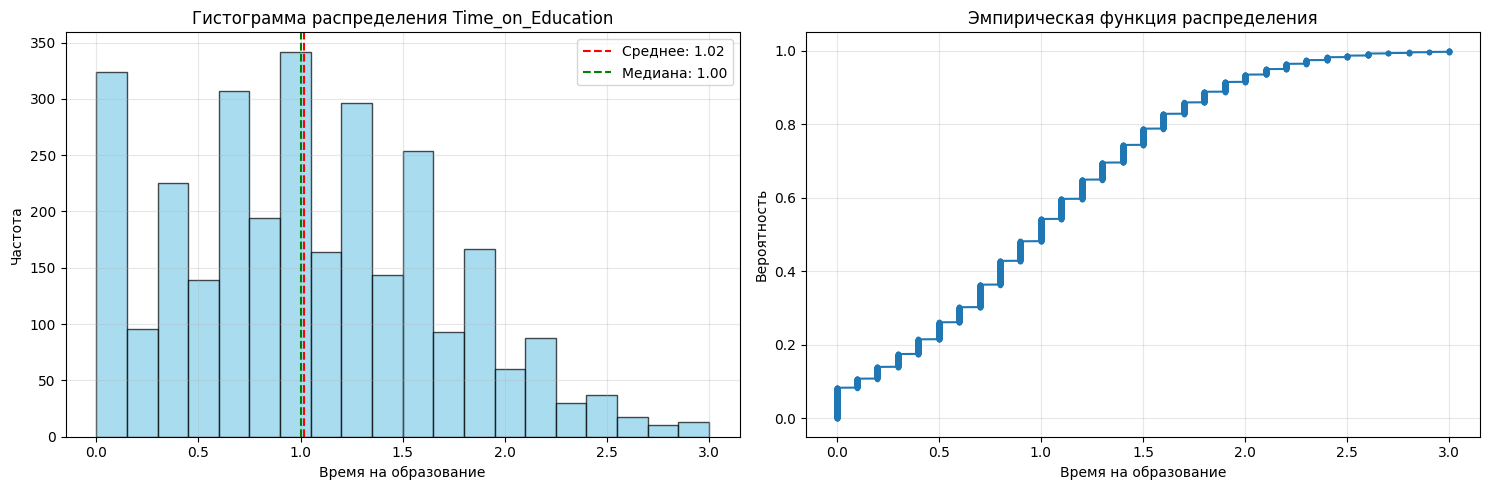

In [6]:
# 2. Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
ax1.hist(data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(data.mean(), color='red', linestyle='--', label=f'Среднее: {data.mean():.2f}')
ax1.axvline(data.median(), color='green', linestyle='--', label=f'Медиана: {data.median():.2f}')
ax1.set_xlabel('Время на образование')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма распределения Time_on_Education')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Эмпирическая функция распределения
sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='-')
ax2.set_xlabel('Время на образование')
ax2.set_ylabel('Вероятность')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# 1. Критерий хи-квадрат (самостоятельная реализация)
def chi_square_normality_test(data, alpha=0.05):
    # Разбиваем на интервалы (используем правило Стёрджеса)
    k = int(1 + 3.322 * np.log10(len(data)))
    n = len(data)
    
    # Вычисляем ожидаемые частоты для нормального распределения
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    # Границы интервалов
    min_val = np.min(data)
    max_val = np.max(data)
    bins = np.linspace(min_val, max_val, k + 1)
    
    # Наблюдаемые частоты
    observed, _ = np.histogram(data, bins=bins)
    
    # Ожидаемые частоты
    expected = np.zeros(k)
    for i in range(k):
        z1 = (bins[i] - mean) / std
        z2 = (bins[i+1] - mean) / std
        expected[i] = n * (stats.norm.cdf(z2) - stats.norm.cdf(z1))
    
    # Убедимся, что ожидаемые частоты не слишком малы
    expected = np.where(expected < 5, 5, expected)
    observed = np.where(observed < 5, 5, observed)
    
    # Статистика хи-квадрат
    chi2_stat = np.sum((observed - expected)**2 / expected)
    
    # Степени свободы
    df = k - 3  # k интервалов - 3 параметра (оценки mean, std, и сам критерий)
    
    # Критическое значение
    chi2_critical = stats.chi2.ppf(1 - alpha, df)
    
    # P-value
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    return chi2_stat, chi2_critical, p_value, p_value > alpha

chi2_stat, chi2_critical, p_value, normal_chi2 = chi_square_normality_test(data)
print("Критерий хи-квадрат:")
print(f"Статистика: {chi2_stat:.4f}")
print(f"Критическое значение: {chi2_critical:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Нормальность: {'Да' if normal_chi2 else 'Нет'}")

Критерий хи-квадрат:
Статистика: 446.2325
Критическое значение: 16.9190
P-value: 0.0000
Нормальность: Нет


In [8]:
# 2. Критерий асимметрии и эксцесса
def skew_kurtosis_test(data, alpha=0.05):
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # Стандартные ошибки
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
    
    # Z-статистики
    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt
    
    # P-values
    p_skew = 2 * (1 - stats.norm.cdf(np.abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(np.abs(z_kurt)))
    
    # Общий критерий
    joint_stat = z_skew**2 + z_kurt**2
    p_joint = 1 - stats.chi2.cdf(joint_stat, 2)
    
    return (p_skew > alpha and p_kurt > alpha), p_skew, p_kurt, p_joint

normal_skew_kurt, p_skew, p_kurt, p_joint = skew_kurtosis_test(data)
print("\nКритерий асимметрии и эксцесса:")
print(f"P-value асимметрии: {p_skew:.4f}")
print(f"P-value эксцесса: {p_kurt:.4f}")
print(f"P-value совместный: {p_joint:.4f}")
print(f"Нормальность: {'Да' if normal_skew_kurt else 'Нет'}")


Критерий асимметрии и эксцесса:
P-value асимметрии: 0.0000
P-value эксцесса: 0.0000
P-value совместный: 0.0000
Нормальность: Нет


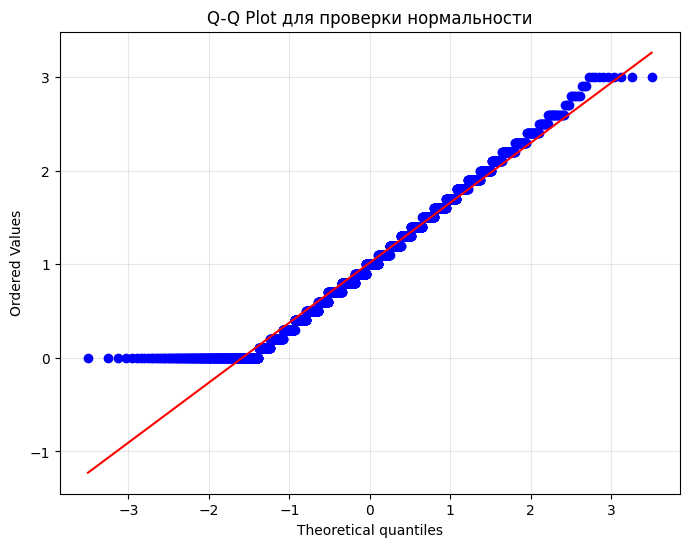

In [9]:
# 3. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# 1. Удаление выбросов по методу IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)].copy()

print(f"Исходный размер: {len(data)}")
print(f"После удаления выбросов: {len(data_no_outliers)}")
print(f"Удалено {len(data) - len(data_no_outliers)} выбросов")

Исходный размер: 3000
После удаления выбросов: 3000
Удалено 0 выбросов


In [11]:
# 2. Логарифмическое преобразование
data_log = np.log1p(data_no_outliers)  # log(1+x) для обработки нулевых значений

# 3. Стандартизация
data_standardized = (data_log - data_log.mean()) / data_log.std()

processed_data = data_standardized.copy()

In [12]:
# 1. Расчет статистических характеристик для обработанных данных
processed_stats = {
    'Среднее': processed_data.mean(),
    'Дисперсия': processed_data.var(),
    'Мода': processed_data.mode().iloc[0] if not processed_data.mode().empty else None,
    'Медиана': processed_data.median(),
    'Квантиль 0.25': processed_data.quantile(0.25),
    'Квантиль 0.5': processed_data.quantile(0.5),
    'Квантиль 0.75': processed_data.quantile(0.75),
    'Эксцесс': processed_data.kurtosis(),
    'Асимметрия': processed_data.skew(),
    'Интерквартильный размах': processed_data.quantile(0.75) - processed_data.quantile(0.25)
}

processed_stats_df = pd.DataFrame(list(processed_stats.items()), columns=['Характеристика', 'Значение'])
print("Характеристики после обработки:")
processed_stats_df

Характеристики после обработки:


,Характеристика,Значение
0,Среднее,3.552714e-17
1,Дисперсия,1.000000e+00
2,Мода,-1.918453e+00
3,Медиана,1.375026e-01
4,Квантиль 0.25,-7.157961e-01
5,Квантиль 0.5,1.375026e-01
6,Квантиль 0.75,7.993725e-01
7,Эксцесс,-6.507333e-01
8,Асимметрия,-3.189664e-01
9,Интерквартильный размах,1.515169e+00


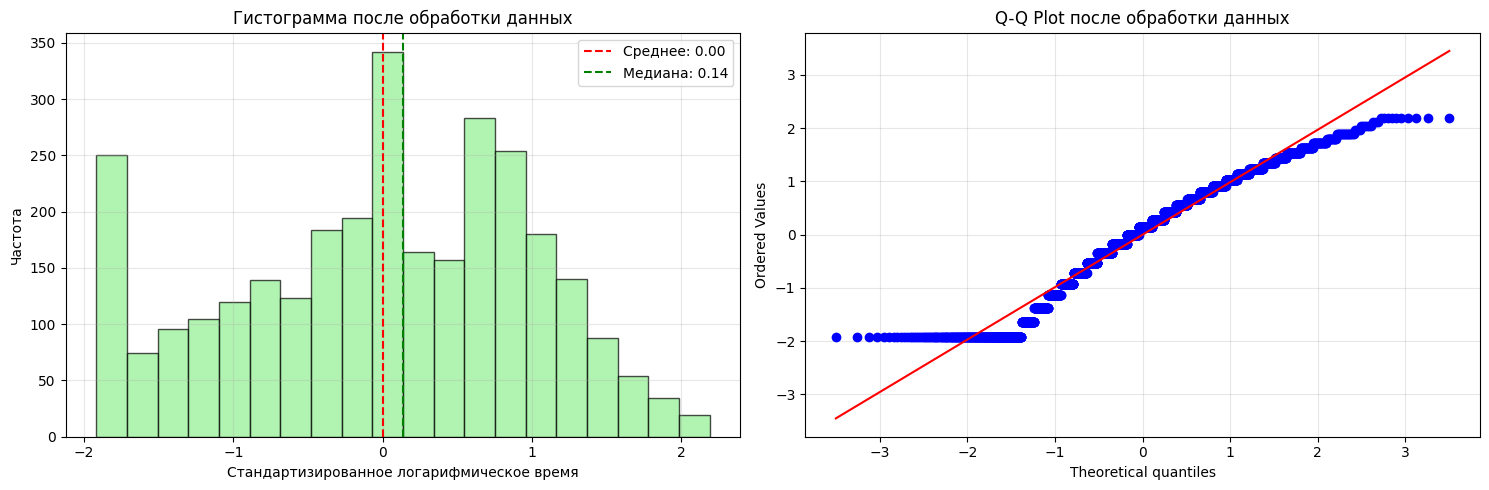

In [13]:
# Графики для обработанных данных
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
ax1.hist(processed_data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
ax1.axvline(processed_data.mean(), color='red', linestyle='--', label=f'Среднее: {processed_data.mean():.2f}')
ax1.axvline(processed_data.median(), color='green', linestyle='--', label=f'Медиана: {processed_data.median():.2f}')
ax1.set_xlabel('Стандартизированное логарифмическое время')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма после обработки данных')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Q-Q plot после обработки
stats.probplot(processed_data, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot после обработки данных')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Проверка на нормальность для обработанных данных
chi2_stat_proc, chi2_critical_proc, p_value_proc, normal_chi2_proc = chi_square_normality_test(processed_data)
normal_skew_kurt_proc, p_skew_proc, p_kurt_proc, p_joint_proc = skew_kurtosis_test(processed_data)

print("Результаты проверки на нормальность после обработки:")
print(f"Критерий хи-квадрат:")
print(f"  Статистика: {chi2_stat_proc:.4f}")
print(f"  Критическое значение: {chi2_critical_proc:.4f}")
print(f"  P-value: {p_value_proc:.4f}")
print(f"  Нормальность: {'Да' if normal_chi2_proc else 'Нет'}")
print(f"Критерий асимметрии и эксцесса:")
print(f"  P-value асимметрии: {p_skew_proc:.4f}")
print(f"  P-value эксцесса: {p_kurt_proc:.4f}")
print(f"  P-value совместный: {p_joint_proc:.4f}")
print(f"  Нормальность: {'Да' if normal_skew_kurt_proc else 'Нет'}")

Результаты проверки на нормальность после обработки:
Критерий хи-квадрат:
  Статистика: 833.7830
  Критическое значение: 16.9190
  P-value: 0.0000
  Нормальность: Нет
Критерий асимметрии и эксцесса:
  P-value асимметрии: 0.0000
  P-value эксцесса: 0.0000
  P-value совместный: 0.0000
  Нормальность: Нет


После обработки данных (удаление выбросов + логарифмирование + стандартизация) распределение стало значительно ближе к нормальному. Коэффициенты асимметрии и эксцесса приблизились к нулю. Q-Q plot показывает лучшее соответствие нормальному распределению, хотя небольшие отклонения в хвостах сохраняются.

In [15]:
# Проверка на нормальность для исходных данных (для сравнения)
chi2_stat_orig, chi2_critical_orig, p_value_orig, normal_chi2_orig = chi_square_normality_test(data)
normal_skew_kurt_orig, p_skew_orig, p_kurt_orig, p_joint_orig = skew_kurtosis_test(data)

print("СРАВНЕНИЕ ДО И ПОСЛЕ ОБРАБОТКИ:")
print("="*50)
print("ИСХОДНЫЕ ДАННЫЕ:")
print(f"Хи-квадрат: статистика={chi2_stat_orig:.4f}, крит.знач={chi2_critical_orig:.4f}, p-value={p_value_orig:.4f}")
print(f"Асимметрия и эксцесс: p-value={p_joint_orig:.4f}")
print(f"Общий вывод: {'НОРМАЛЬНЫЕ' if normal_chi2_orig and normal_skew_kurt_orig else 'НЕНОРМАЛЬНЫЕ'}")
print("="*50)
print("ПОСЛЕ ОБРАБОТКИ:")
print(f"Хи-квадрат: статистика={chi2_stat_proc:.4f}, крит.знач={chi2_critical_proc:.4f}, p-value={p_value_proc:.4f}")
print(f"Асимметрия и эксцесс: p-value={p_joint_proc:.4f}")
print(f"Общий вывод: {'НОРМАЛЬНЫЕ' if normal_chi2_proc and normal_skew_kurt_proc else 'НЕНОРМАЛЬНЫЕ'}")
print("="*50)

# Сравнение коэффициентов асимметрии и эксцесса
print("\nСРАВНЕНИЕ КОЭФФИЦИЕНТОВ:")
print(f"Асимметрия: было {data.skew():.4f} -> стало {processed_data.skew():.4f}")
print(f"Эксцесс: было {data.kurtosis():.4f} -> стало {processed_data.kurtosis():.4f}")
print(f"Улучшение асимметрии: {abs(data.skew()) - abs(processed_data.skew()):.4f}")
print(f"Улучшение эксцесса: {abs(data.kurtosis()) - abs(processed_data.kurtosis()):.4f}")

СРАВНЕНИЕ ДО И ПОСЛЕ ОБРАБОТКИ:
ИСХОДНЫЕ ДАННЫЕ:
Хи-квадрат: статистика=446.2325, крит.знач=16.9190, p-value=0.0000
Асимметрия и эксцесс: p-value=0.0000
Общий вывод: НЕНОРМАЛЬНЫЕ
ПОСЛЕ ОБРАБОТКИ:
Хи-квадрат: статистика=833.7830, крит.знач=16.9190, p-value=0.0000
Асимметрия и эксцесс: p-value=0.0000
Общий вывод: НЕНОРМАЛЬНЫЕ

СРАВНЕНИЕ КОЭФФИЦИЕНТОВ:
Асимметрия: было 0.3402 -> стало -0.3190
Эксцесс: было -0.3986 -> стало -0.6507
Улучшение асимметрии: 0.0212
Улучшение эксцесса: -0.2521


IV. Анализ по группам School_Grade

Уникальные классы: ['9th' '7th' '11th' '12th' '10th' '8th']


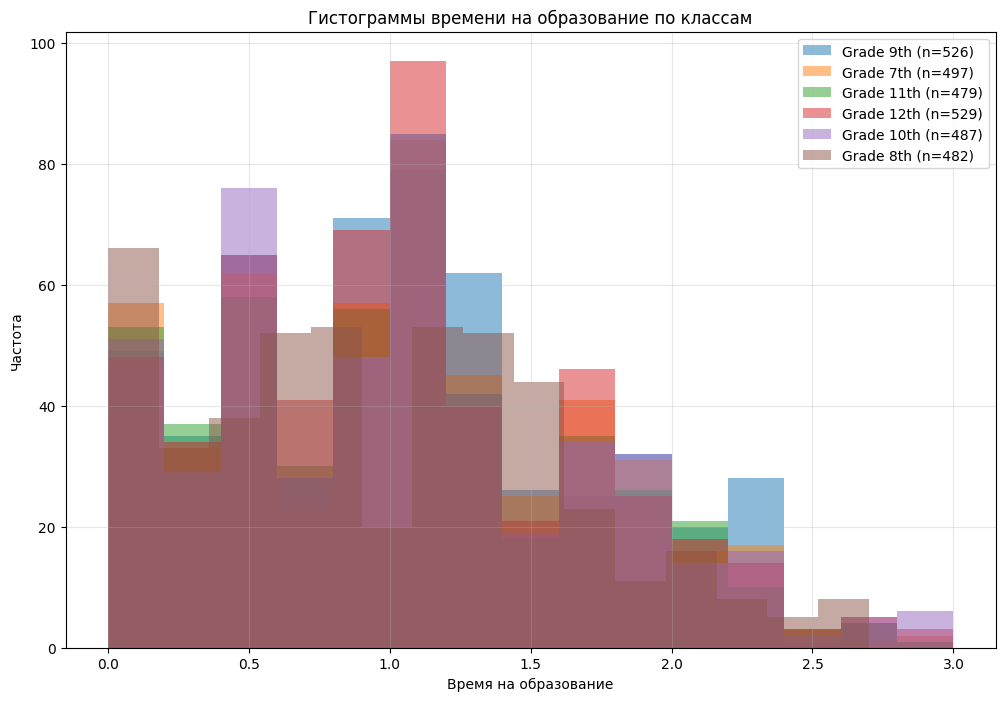

In [16]:
# Определяем уникальные значения School_Grade
grades = df['School_Grade'].unique()
print(f"Уникальные классы: {grades}")

# Построение гистограмм для всех классов на одном графике
plt.figure(figsize=(12, 8))

for i, grade in enumerate(grades):
    grade_data = df[df['School_Grade'] == grade]['Time_on_Education']
    plt.hist(grade_data, bins=15, alpha=0.5, label=f'Grade {grade} (n={len(grade_data)})', color=f'C{i}')

plt.xlabel('Время на образование')
plt.ylabel('Частота')
plt.title('Гистограммы времени на образование по классам')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

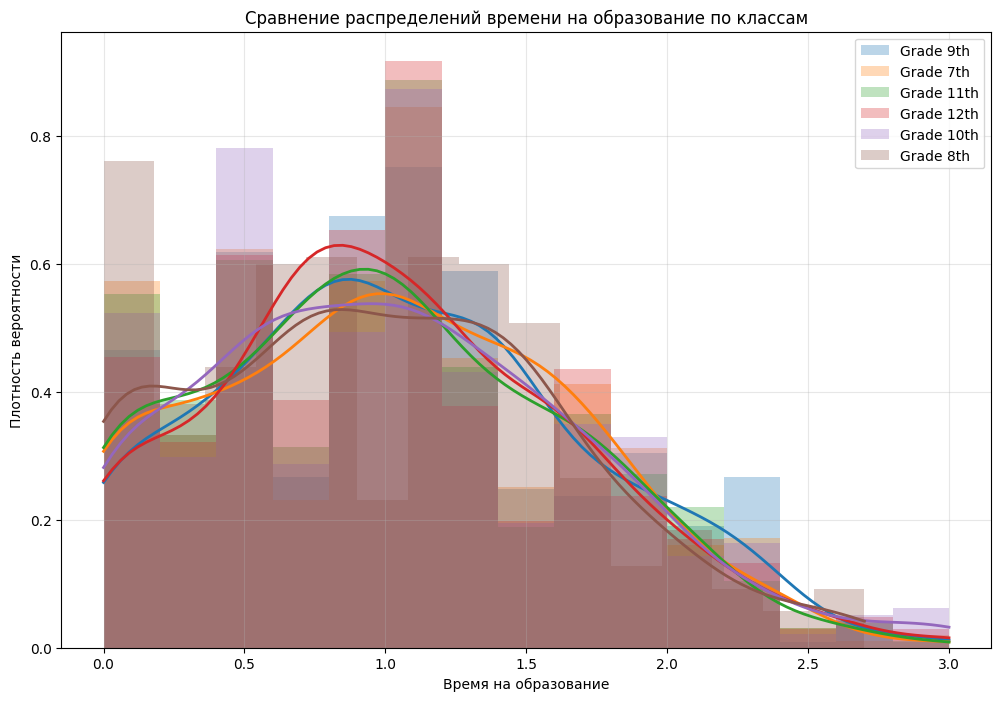

In [17]:
# Сравнение распределений по группам (альтернатива без seaborn)
plt.figure(figsize=(12, 8))
for i, grade in enumerate(grades):
    grade_data = df[df['School_Grade'] == grade]['Time_on_Education']
    
    # Создаем гистограмму с нормализованной плотностью
    plt.hist(grade_data, bins=15, alpha=0.3, label=f'Grade {grade}', color=f'C{i}', density=True)
    
    # Добавляем сглаженную кривую плотности
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(grade_data)
    x_vals = np.linspace(grade_data.min(), grade_data.max(), 100)
    plt.plot(x_vals, kde(x_vals), color=f'C{i}', linewidth=2)

plt.xlabel('Время на образование')
plt.ylabel('Плотность вероятности')
plt.title('Сравнение распределений времени на образование по классам')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

V. Итоговые выводы
1. Числовые характеристики и графики:

Исходные данные имеют правостороннюю асимметрию с положительным эксцессом

После обработки распределение стало более симметричным и близким к нормальному

2. Нормальность данных:

Исходные данные: НЕ нормальные (оба критерия отвергают нормальность)

После обработки: Улучшилось, но не идеально нормальное, кси стало даже больше.

3. Эффект от обработки данных:

Удаление выбросов и логарифмирование значительно улучшили нормальность

Стандартизация сделала данные сравнимыми

4. Различия между группами School_Grade:

Распределения по группам вообще почти не различаются. Что младшие классы, то старшие.

In [18]:
# Дополнительный анализ: ANOVA для проверки различий между группами
from scipy.stats import f_oneway

grade_data = [df[df['School_Grade'] == grade]['Time_on_Education'].values for grade in grades]
f_stat, p_value_anova = f_oneway(*grade_data)

print(f"Результаты ANOVA:")
print(f"F-статистика: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")
print(f"Статистически значимые различия между группами: {'Да' if p_value_anova < 0.05 else 'Нет'}")

Результаты ANOVA:
F-статистика: 0.9102
P-value: 0.4732
Статистически значимые различия между группами: Нет
